# Interest rates set by the Fed
## Caio Machado
## Macroeconomics II
### This is a complement to lecture note #3.


In [1]:
### Preamble
using Plots, RCall, DataFrames
gr(legend=false,linewidth=2)

# R packages used through RCall:
R"""
foo <- c("tidyverse","fredr")
pacman::p_load(char = foo)
fredr_set_key("59edcd766b87f7feca168face94a5ffe") # Fred data API Key
"""

# The next function downloads data from Fred using RCall and the fredr package. 
function fredfun(var_id,var_name;frequency=false, observation_start="1600-01-01",
        observation_end="3000-01-01", aggregation_method="avg")
        @rput var_id observation_start observation_end frequency frequency aggregation_method
        R"""
        if (frequency == FALSE) {
                df <- fredr(series_id=var_id, observation_start = as.Date(observation_start), 
                observation_end = as.Date(observation_end))
        } else {
                df <- fredr(series_id=var_id, observation_start = as.Date(observation_start), 
                observation_end = as.Date(observation_end), frequency=frequency, aggregation_method=aggregation_method)
        }
        """
        @rget df
        select!(df,[:date,:value])
        rename!(df,:value=>var_name)
        return df
end;

Let's download and plot three variables:
* The Fed discount rate, which is the interest rate the Fed charges financial institutions for funds lent overnight;
* The interest rate the Fed pays on the reserves the financial institutions have at the Fed;
* The interbank market rate, which is the short term interest rate at which financial institutions borrow from each other.

A note: In practice, not all financial institutions have the option to keep "traditional" reserves at the Fed. Therefore, I will use the so called "overnight reverse repurchase agreement" rate, which for all practices purposes we can interpret as the interest rate financial institutions pay when they borrow from the Fed.

In [2]:
# Downloading data and formatting data:
discount_rate = fredfun("DPCREDIT","discount_rate",frequency="d") # Discount rate
reserves_rate = fredfun("RRPONTSYAWARD","reserve_rate",frequency="d") # Interest rate on reserves (reverse repos)
interbank_rate = fredfun("EFFR","interbank_rate",frequency="d") # Interbank rate
df = innerjoin(discount_rate,reserves_rate,interbank_rate,on=:date) # Joining dataframes

,date,discount_rate,reserve_rate,interbank_rate
,Date…,Float64,Float64?,Float64?
1,2013-09-23,0.75,0.01,0.09
2,2013-09-24,0.75,0.01,0.09
3,2013-09-25,0.75,0.01,0.08
4,2013-09-26,0.75,0.01,0.08
5,2013-09-27,0.75,0.01,0.08
6,2013-09-30,0.75,0.01,0.06
7,2013-10-01,0.75,0.01,0.08
8,2013-10-02,0.75,0.01,0.07
9,2013-10-03,0.75,0.01,0.08


Plotting:

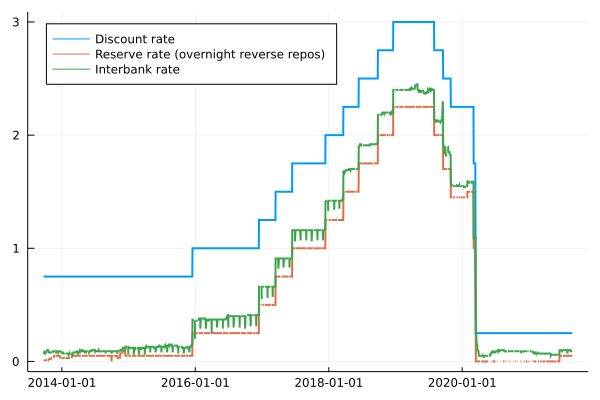

In [3]:
plot(df.date,df.discount_rate,label="Discount rate",legend=:topleft)
plot!(df.date,df.reserve_rate,label="Reserve rate (overnight reverse repos)")
plot!(df.date,df.interbank_rate,label="Interbank rate")